In [417]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [418]:
# Part 1: Camera radiometric calibration
# 1.1 Read the Original Picture,crop out a central portion of each images

In [419]:
import sys
import PIL
from PIL import Image
import os
dirListing = os.listdir('./calibration/')
list_im = []
for item in dirListing:
        list_im.append('./calibration/'+item)
   

In [420]:
print(list_im)

['./calibration/.DS_Store', './calibration/8.JPG', './calibration/9.JPG', './calibration/10.JPG', './calibration/4.JPG', './calibration/5.JPG', './calibration/7.JPG', './calibration/6.JPG', './calibration/2.JPG', './calibration/3.JPG', './calibration/1.JPG']


In [421]:
for i in list_im:
    if i == "./calibration/.DS_Store":continue
    else:
        img = cv2.imread(i)
        #print(i)
        cropped = img[1500:1600, 2000:2100]
        filename = i.replace("calibration","crop")
        #print(filename)
        cv2.imwrite(filename,cropped)

In [422]:
#split the crop image into RGB image
for i in range (1,11):
    filename = "./crop/" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./cropB/" + str(i) + ".jpg"
    filenameR = "./cropR/" + str(i)  + ".jpg"
    filenameG = "./cropG/" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)



In [423]:
# 1.2 break down the original image into RGB channel

In [424]:
# average brighterness value

In [425]:
B = []
G = []
R = []
for i in range (1,11):
    filenameB = "./cropB/" + str(i) + ".jpg"
    filenameR = "./cropR/" + str(i)  + ".jpg"
    filenameG = "./cropG/" + str(i)  + ".jpg"
    BB = cv2.imread(filenameB)
    GG = cv2.imread(filenameG)
    RR = cv2.imread(filenameR)
    B1=BB[1]
    averageB = np.mean(B1.reshape(-1, 300), axis=1)*3
    c = averageB[0]
    B.append(c)
    
    G1=GG[1]
    averageG = np.mean(G1.reshape(-1, 300), axis=1)*3
    d = averageG[0]
    G.append(d)
    
    R1=RR[1]
    averageR = np.mean(R1.reshape(-1, 300), axis=1)*3
    e = averageR[0]
    R.append(e)
 

In [426]:
print(B)

[214.53000000000003, 194.2, 159.21, 130.64, 114.44, 95.53, 90.38, 70.86, 48.510000000000005, 36.18]


In [427]:
# RGB vs T

In [428]:
import matplotlib.pyplot as plt

In [429]:
T = [1/351,1/501,1/754,1/1008,1/1520,1/2037,1/3096,1/4167,1/6410,1/8772]

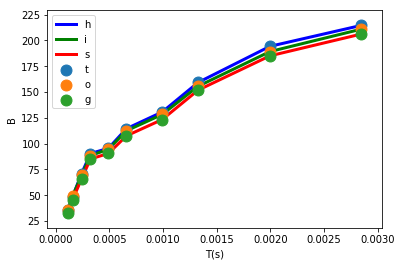

In [430]:
#plt.plot([x, y, 'ro')])
plt.plot(T, B, 'B', zorder=1, lw=3)
plt.scatter(T, B, s=120, zorder=2)
plt.plot(T, G, 'g', zorder=1, lw=3)
plt.scatter(T, G, s=120, zorder=2)
plt.plot(T, R, 'r', zorder=1, lw=3)
plt.scatter(T, R, s=120, zorder=2)
plt.xlabel('T(s)')
plt.ylabel('B')
plt.legend(('histogram'), loc = 'upper left')
plt.savefig("./Figure1/BT"+str(i)+".png")
plt.show()

In [431]:
from math import log
B_log=[log(y,10) for y in B]
G_log=[log(y,10) for y in G]
R_log=[log(y,10) for y in R]
T_log=[log(y,10) for y in T]

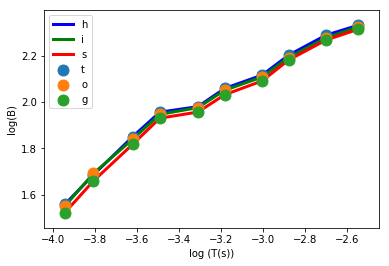

In [432]:
plt.plot(T_log, B_log, 'b', zorder=1, lw=3)
plt.scatter(T_log, B_log, s=120, zorder=2)
plt.plot(T_log, G_log, 'g', zorder=1, lw=3)
plt.scatter(T_log, G_log, s=120, zorder=2)
plt.plot(T_log, R_log, 'r', zorder=1, lw=3)
plt.scatter(T_log, R_log, s=120, zorder=2)
plt.xlabel('log (T(s))')
plt.ylabel('log(B)')
plt.legend(('histogram'), loc = 'upper left')
plt.savefig("./Figure1/logBlogT"+str(i)+".png")
plt.show()

In [433]:
x= np.asarray(T_log)
y= np.asarray(R_log)
yG= np.asarray(G_log)
yB= np.asarray(B_log)

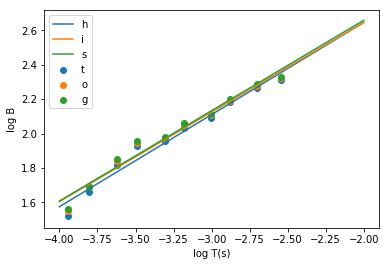

In [434]:
from sklearn.linear_model import LinearRegression
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

# Red channel
modelR = LinearRegression(fit_intercept=True)

modelR.fit(x[:, np.newaxis], y)

xfit = np.linspace(-4, -2, 100)
yfit = modelR.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

#Blue channel
modelB = LinearRegression(fit_intercept=True)

modelB.fit(x[:, np.newaxis], yG)

xfit = np.linspace(-4, -2, 100)
yfitG = modelB.predict(xfit[:, np.newaxis])

plt.scatter(x, yG)
plt.plot(xfit, yfitG)



#Green channel
modelG = LinearRegression(fit_intercept=True)

modelG.fit(x[:, np.newaxis], yB)

xfit = np.linspace(-4, -2, 100)
yfitB = modelG.predict(xfit[:, np.newaxis])

plt.scatter(x, yB)
plt.plot(xfit, yfitB)

plt.legend(('histogram'), loc = 'upper left')

plt.xlabel('log T(s)')
plt.ylabel('log B')

plt.savefig("./Figure1/LinearRegression"+str(i)+".png")

In [435]:
print("ModelR slope:    ", modelR.coef_[0])
print("ModelR intercept:", modelR.intercept_)

ModelR slope:     0.5362621842373625
ModelR intercept: 3.7188055835048934


In [436]:
print("ModelG slope:    ", modelG.coef_[0])
print("ModelG intercept:", modelG.intercept_)

ModelG slope:     0.5260671169773633
ModelG intercept: 3.7112562930468074


In [437]:
print("ModelB slope:    ", modelB.coef_[0])
print("ModelB intercept:", modelB.intercept_)

ModelB slope:     0.5214372505507467
ModelB intercept: 3.689125447417296


In [438]:
oneOverG = [modelR.coef_[0], modelG.coef_[0], modelB.coef_[0]]

In [439]:
print(oneOverG)

[0.5362621842373625, 0.5260671169773633, 0.5214372505507467]


In [440]:
gofB = [1/modelR.coef_[0], 1/modelG.coef_[0], 1/modelB.coef_[0]]

In [441]:
print(gofB)

[1.864759495249764, 1.9008981320591267, 1.9177762979990227]


In [442]:
R_real = R**oneOverG[0]
G_real = G**oneOverG[1]
B_real = B**oneOverG[2]

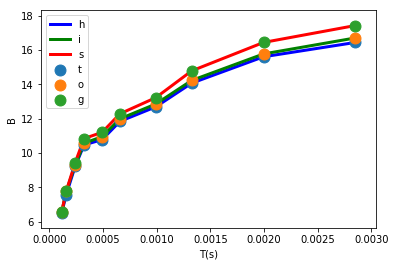

In [443]:
plt.plot(T, B_real, 'b', zorder=1, lw=3)
plt.scatter(T, B_real, s=120, zorder=2)
plt.plot(T, G_real, 'g', zorder=1, lw=3)
plt.scatter(T, G_real, s=120, zorder=2)
plt.plot(T, R_real, 'r', zorder=1, lw=3)
plt.scatter(T, R_real, s=120, zorder=2)
plt.xlabel('T(s)')
plt.ylabel('B')
plt.legend(('histogram'), loc = 'upper left')
plt.savefig("./Figure1/BrealT"+str(i)+".png")
plt.show()

In [444]:
# Part 2: Acquire a picture stack

In [445]:
import os
dirListing = os.listdir('./HDRO/')
list_HDR = []
for item in dirListing:
        list_HDR.append('./HDRO/'+item)

In [446]:
print(list_HDR)

['./HDRO/.DS_Store', './HDRO/2.JPG', './HDRO/3.JPG', './HDRO/1.JPG']


In [447]:
del list_HDR[0]

In [448]:
print(list_HDR)

['./HDRO/2.JPG', './HDRO/3.JPG', './HDRO/1.JPG']


In [449]:
for i in range (1,4):
    filename = "./HDRO/" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./HDROB/" + str(i) + ".jpg"
    filenameR = "./HDROR/" + str(i)  + ".jpg"
    filenameG = "./HDROG/" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)




In [450]:
TofHDR=[1/180,1/351,1/2037]

In [451]:
print(gofB[1])

1.9008981320591267


In [452]:
filenameR = "./HDROR/" + str(1)  + ".jpg"
img = cv2.imread(filenameR)

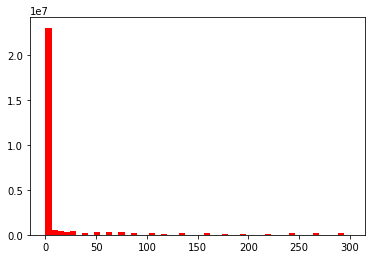

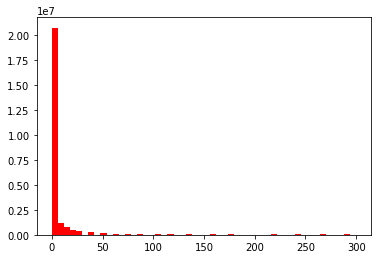

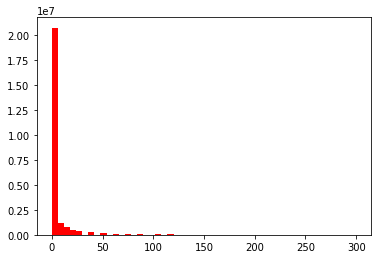

In [453]:
#Red channel
for i in range (1,4):
    filenameR = "./HDROR/" + str(i)  + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(np.power(img.ravel().astype(float),gofB[0]) ,50,[0,300],color = "r") 
    plt.savefig("./Figure2.2/originalred"+str(i)+".png")
    plt.show() 
   

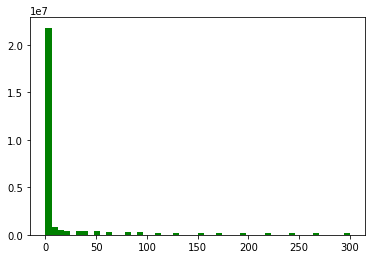

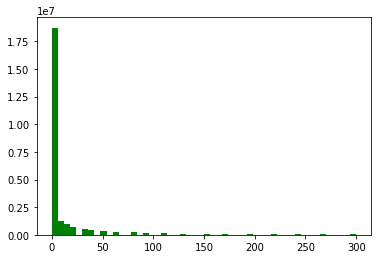

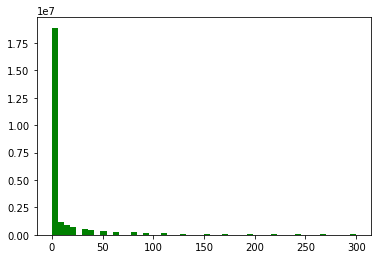

In [454]:
#Green channel
for i in range (1,4):
    filenameG = "./HDROG/" + str(i)  + ".jpg"
    img = cv2.imread(filenameG)
    plt.hist(np.power(img.ravel().astype(float),gofB[1]),50,[0,300],color = "g") 
    plt.savefig("./Figure2.2/originalgreen"+str(i)+".png")
    plt.show() 
    

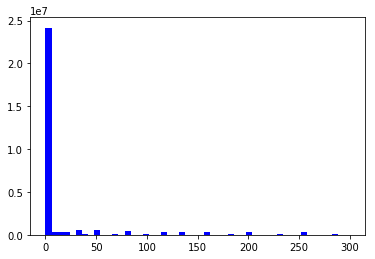

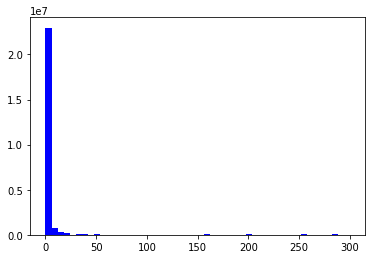

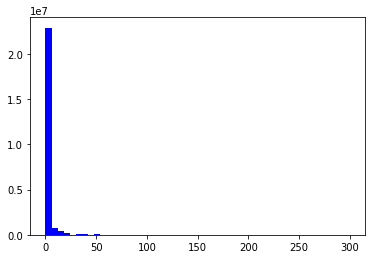

In [455]:
#Blue channel
for i in range (1,4):
    filenameB = "./HDROB/" + str(i)  + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(np.power(img.ravel().astype(float),gofB[2]),50,[0,300],color = "b") 
    plt.savefig("./Figure2.2/originalblue"+str(i)+".png")
    plt.show() 
   

In [456]:
# a1 = 5.80342

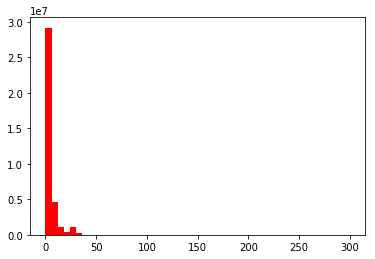

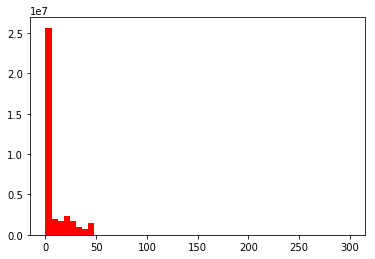

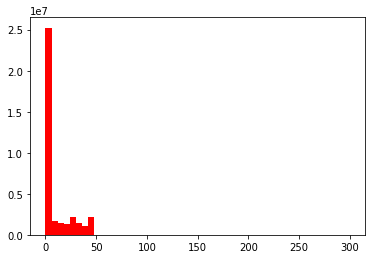

In [477]:
#Red channel
for i in range (1,4):
    filenameR = "./HDROR/" + str(i)  + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(img.ravel().astype(float)/5.80342,50,[0,300],color = "r") 
    plt.savefig("./Figure2.3/a5/a5r"+str(i)+".png")
    plt.show() 
   

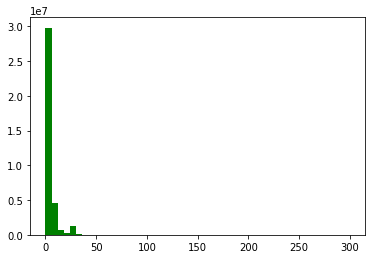

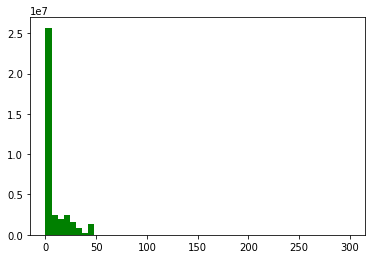

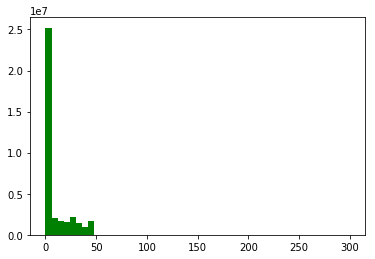

In [478]:
#Green channel
for i in range (1,4):
    filenameG = "./HDROG/" + str(i)  + ".jpg"
    img = cv2.imread(filenameG)
    plt.hist(img.ravel().astype(float)/5.80342,50,[0,300],color = "g") 
    plt.savefig("./Figure2.3/a5/a5g"+str(i)+".png")
    plt.show() 
    

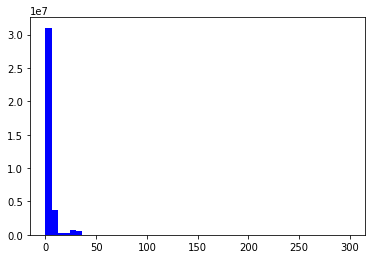

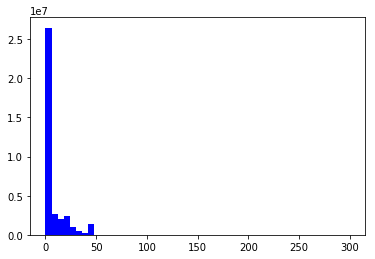

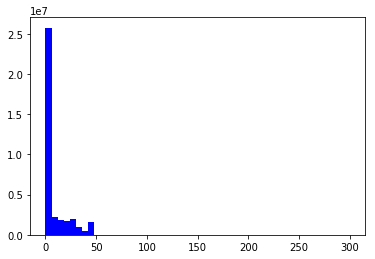

In [479]:
#Blue channel
for i in range (1,4):
    filenameB = "./HDROB/" + str(i)  + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(img.ravel().astype(float) /5.80342,50,[0,300],color = "b") 
    plt.savefig("./Figure2.3/a5/a5b"+str(i)+".png")
    plt.show() 
   

In [480]:
# a2 = 11.3167

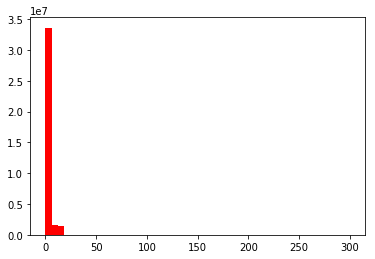

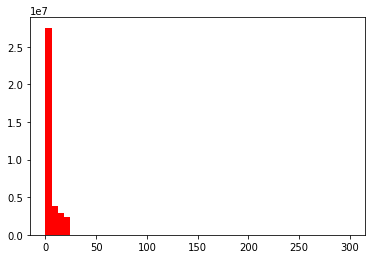

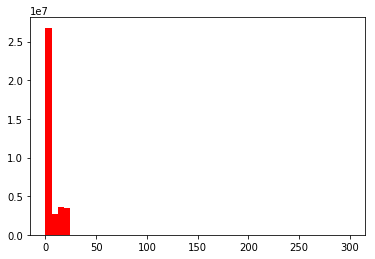

In [461]:
#Red channel
for i in range (1,4):
    filenameR = "./HDROR/" + str(i)  + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(img.ravel().astype(float) /11.3167,50,[0,300],color = "r") 
    plt.savefig("./Figure2.3/a10/a10r"+str(i)+".png")
    plt.show() 
   

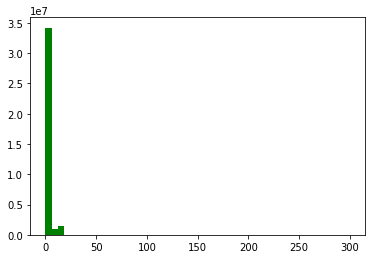

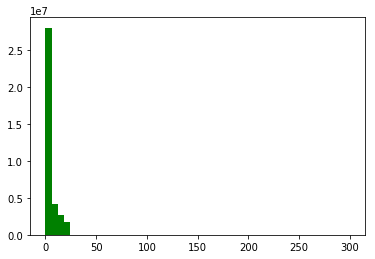

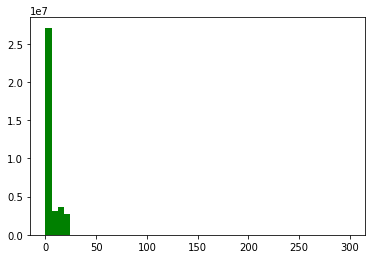

In [462]:
#Green channel
for i in range (1,4):
    filenameG = "./HDROG/" + str(i)  + ".jpg"
    img = cv2.imread(filenameG)
    plt.hist(img.ravel().astype(float) /11.3167,50,[0,300],color = "g") 
    plt.savefig("./Figure2.3/a10/a10g"+str(i)+".png")
    plt.show() 
    

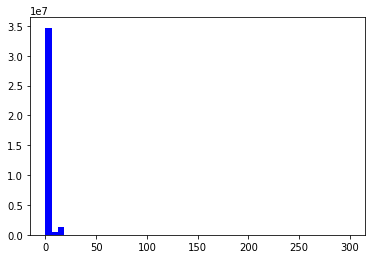

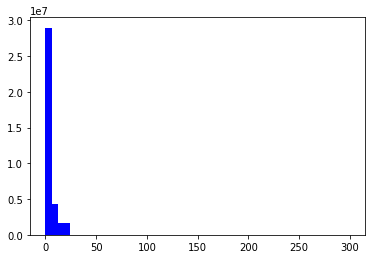

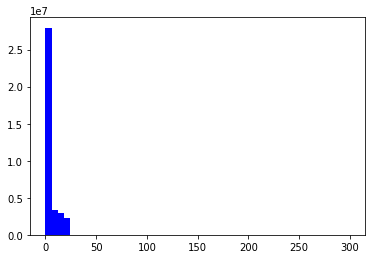

In [463]:
#Blue channel
for i in range (1,4):
    filenameB = "./HDROB/" + str(i)  + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(img.ravel().astype(float) /11.3167,50,[0,300],color = "b") 
    plt.savefig("./Figure2.3/a10/a10b"+str(i)+".png")
    plt.show() 
   

In [ ]:
# Part 4: Reproduce composite image

In [465]:
# image

In [503]:

img1 = cv2.imread("./HDRO/1.jpg")
img2 = cv2.imread("./HDRO/2.jpg")
img3 = cv2.imread("./HDRO/3.jpg")


In [504]:
img1.shape

(3024, 4032, 3)

In [505]:
img2.shape

(3024, 4032, 3)

In [506]:
img3.shape

(3024, 4032, 3)

In [542]:
HDR1 = np.zeros(img1.shape)
HDR2 = np.zeros(img1.shape)

In [ ]:
#HDR 1
for c in range(3):
    for i in range(3024):
        for j in range(4032):
            if(img2[i,j,c]**gofB[0]>255):
                HDR1[i,j,c]=img1[i,j,c]**gofB[c]
            if((img3[i,j,c]**gofB[0]>255)& (img2[i,j,c]**gofB[0] < 255)):
                HDR1[i,j,c]=img1[i,j,c]**gofB[c]
            else:
                HDR2[i,j,c] = img3[i,j,c]**gofB[c]/11


In [ ]:
cv2.imwrite("HDR1.jpg",HDR1)

In [545]:
# HDR 2
for c in range(3):
    for i in range(3024):
        for j in range(4032):
            if(img3[i,j,c]**gofB[0]<255):
                HDR2[i,j,c]=(img1[i,j,c]**gofB[c]+img2[i,j,c]**gofB[c]/5)/2
            else:
                HDR2[i,j,c] = img1[i,j,c]**gofB[c]


In [546]:
cv2.imwrite("HDR2.jpg",HDR2)

True

In [ ]:
# Part 3: Create a composite image